# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [4]:
# Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

<AxesSubplot:xlabel='Age', ylabel='Absences'>

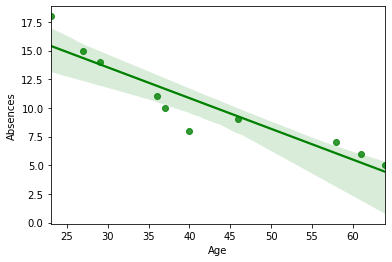

In [7]:
# your code here
data = pd.read_csv("../data/absences.csv")

sns.regplot(data=data, x='Age', y='Absences', color='green')

In [ ]:
# your comments here
'''
It seems to be a negative relation between Age & Absences.
'''

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [8]:
# your code here
def reg_param(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    b1 = sum((X - mean_X) * (Y - mean_Y)) / sum((X - mean_X)**2)
    b0 = mean_Y - b1 * mean_X
    return b0, b1

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [12]:
# your code here
intercept, slope = reg_param(data.Age, data.Absences)

In [13]:
print("Slope:    ", slope)
print("Intercept:", intercept)

Slope:     -0.2681088337033404
Intercept: 21.58738189891063


<AxesSubplot:xlabel='Age', ylabel='Age'>

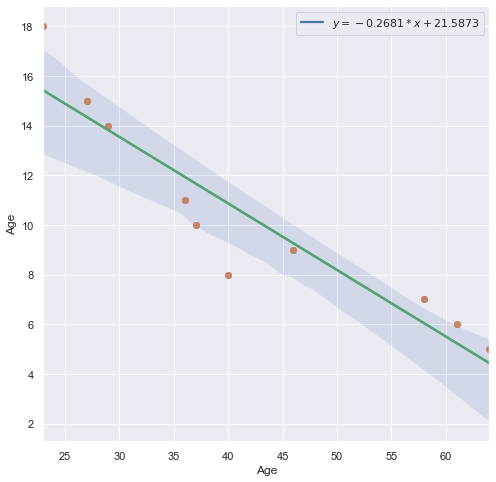

In [17]:
predict_y = slope * data.Age + intercept
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.regplot(x=data.Age, y=data.Absences, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
ax.legend()
sns.regplot(x=data.Age, y=data.Absences, fit_reg=False, ax=ax)
sns.regplot(x=data.Age, y=predict_y, scatter=False, ax=ax)

In [ ]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [41]:
# your code here
def corr_param_(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    b1 = sum((X - mean_X) * (Y - mean_Y)) / sum((X - mean_X)**2)
    b0 = mean_Y - b1 * mean_X
    pred_Y = b0 + b1 * np.array(X)
    SSR = sum((pred_Y - mean_Y)**2)
    SST = sum((Y - mean_Y)**2)
    r2 = round((SSR / SST), 3)
    cov = round(sum((X - mean_X) * (Y - mean_Y)) / len(X), 3)
    return cov, r2

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [42]:
# your code here
corr_param_(data.Age, data.Absences)

(-51.93, 0.87)

In [ ]:
# your comments here
'''
The parameters correlate but not enough to say that they are related.
'''

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here
'''
I would say that they are related by I would not affirm that age is an indicator of absenteeism
'''

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [43]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [46]:
# your code here
corr_param_(ironbeers_df.X, ironbeers_df.Y)

(10.5, 0.955)

In [ ]:
# your comments here
'''
There is a direct relation between the people that you offer to make a beer and the people that finally stay.
'''

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

<AxesSubplot:xlabel='X', ylabel='X'>

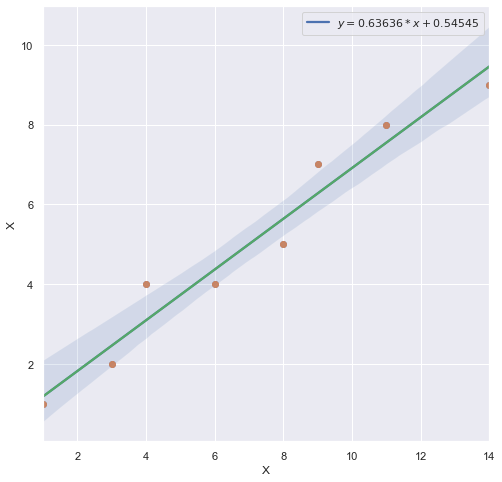

In [47]:
# your code here
intercept, slope = reg_param(ironbeers_df.X, ironbeers_df.Y)
predict_y = slope * ironbeers_df.X + intercept
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.regplot(x=ironbeers_df.X, y=ironbeers_df.Y, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
ax.legend()
sns.regplot(x=ironbeers_df.X, y=ironbeers_df.Y, fit_reg=False, ax=ax)
sns.regplot(x=ironbeers_df.X, y=predict_y, scatter=False, ax=ax)

In [ ]:
# your comments here

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [ ]:
# your code here

In [ ]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here
'''
NO :-) I am the one that make people stay
'''

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [49]:
# your code here
ironbeers_df["expected_Y"] = slope * ironbeers_df.X + intercept

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

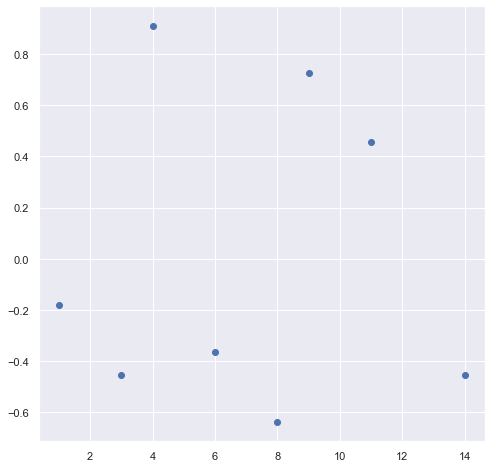

In [51]:
# your code here
ironbeers_df["error"] = ironbeers_df.Y - ironbeers_df.expected_Y

fig, ax = plt.subplots()
ax.scatter(ironbeers_df.X, ironbeers_df.error)

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here
'''
The points with higher error are X=[4,8,9].
'''

#### 4.- Remove the points with a high error and recalculate the regression line.

<AxesSubplot:xlabel='X', ylabel='X'>

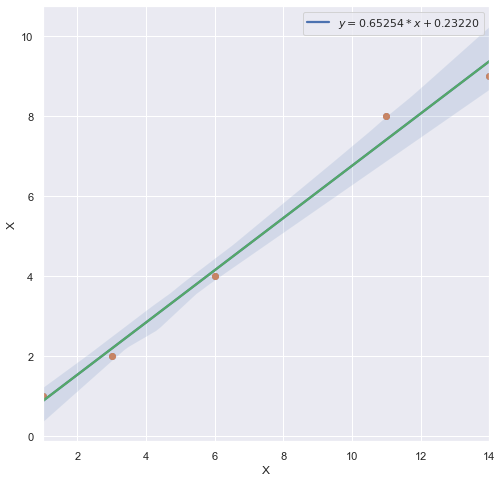

In [54]:
# your code here
ironbeers_df_2 = pd.DataFrame({'X': [1,3,6,11,14], 'Y': [1,2,4,8,9]})

intercept, slope = reg_param(ironbeers_df_2.X, ironbeers_df_2.Y)
predict_y = slope * ironbeers_df_2.X + intercept
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.regplot(x=ironbeers_df_2.X, y=ironbeers_df_2.Y, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
ax.legend()
sns.regplot(x=ironbeers_df_2.X, y=ironbeers_df_2.Y, fit_reg=False, ax=ax)
sns.regplot(x=ironbeers_df_2.X, y=predict_y, scatter=False, ax=ax)

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [55]:
# your code here
corr_param_(ironbeers_df_2.X, ironbeers_df_2.Y)

(15.4, 0.989)

In [ ]:
# your comments here
'''
By removing the points with higher error we end up having better correlation.
'''